In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

Creazione del grafo con l'algoritmo di Barabasi-Albert

In [2]:
N = 20
M = 3
G = nx.barabasi_albert_graph(N, M)

Rappresentazione del grafico

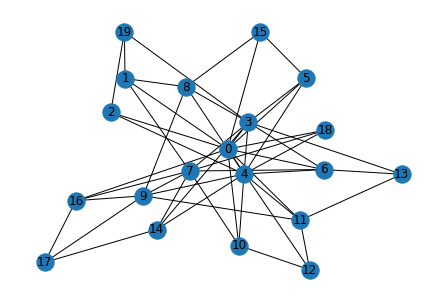

In [3]:
nx.draw(G, with_labels=True)
plt.show()

Estrazione della matrice di adiacenza A

In [4]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

In [ ]:
autovalori, autovettori = np.linalg.eig(matrix)

Estrazione della matrice di stocastica P

In [5]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui è fatta secondo una distribuzione uniforme.

In [6]:
walker_per_node = 2
for n in G.nodes:
    G.nodes[n]['N_i'] = walker_per_node

In [7]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [8]:
history = [[walker_per_node] * len(G.nodes)]
time_steps = int(1e9)

In [ ]:
for t in range(time_steps):
    dynamic_evolution(G, history)

In [ ]:
for n in range(100):
    if n == 99:
        plt.plot(G.nodes, history[len(history)-1], 'r' ,alpha = 1)
    else:
        y = int(n * len(history) / 100)
        plt.plot(G.nodes, history[n], '#ca9bf7', alpha = 0.05)
plt.show()